## CHURN ANALYSIS WITH RANDOM FORESTS CLASSIFICATION

### PART I: RESEARCH QUESTION

**A.1.** Can we identify the features such as customer bandwidth usage, age, and the services the customers use that contribute to customer Churn using Random Forests Classifier?

**A.2** The goal of this data analysis is to create a machine-learning model that can be used to identify which features are contributing to customer churn.

### PART II: METHOD JUSTIFICATION

**B.1.** For my analysis, I choose Random Forests Classifier supervised machine learning ensemble algorithm. Random Forest grows a forest from many decision trees, each tree using bootstrap sampling. At each node, the algorithm chooses n variables, finds the best split, grows the trees to maximum depth for classification, and votes the trees to get predictions for new data (Cutler, A.,2010)$^1$. Because of this in-depth process, Random Forests outperform the Decision Trees in many analyses. For my dataset and analysis, Random Forests proved to have the highest accuracy, and aucroc scores compared to the other classification algorithms.

**B.2.** One of the assumptions Random Forests have is that there should be no null values in the dataset. 

**B.3.** The list of libraries and packages used for the analysis:

| LIBRARIES & PACKAGES | USAGE | 
| :-: | :-: |
| pandas | Library for importing data, creating dataframes, manipulating data |
| numpy | Library for mathematical functions |
| matplotlib | Plotting Library |
| seaborn | Visualizations library|
| warnings | Library to manipulate warnings displayed |
| sklearn| Machine learning library for classification, regression, model selection, preprocessing |
| sklearn.feature_selection | Package for feature selections and Grid Search |
| sklearn.model_selection | Package for splitting data into train and test sets |
| imblearn.model_selection | Library from MIT works in tandem with scikitlearn, SMOTE package used to reduce imbalance in data | 
| sklearn.metrics | Package to implement measures for classification report, accuracy and roc score, confusion matrix |
| sklearn.tree | Package for Decision Trees |
| sklearn.ensemble | Package for Random Forests, Boosting |
| sklearn.linear_model | Package for Linear and Logistic Regerssion |
| sklearn.neighbors | Package to implement functionality for neighbor based learning methods |


## PART III: DATA PREPARATION

**C.1** One preprocessing goal relevant to the prediction method was to implement SMOTE. Smote is an oversampling technique to add synthetic samples for the underrepresented class (Sathpathy, 2020)$^2$. In my data, Churn's positive class was under-represented, and this would cause overfitting and bias leading to lower f1 score, recall, and precision scores. Therefore I utilized the 'imbalance' library from MIT, which works in conjunction with scikit-learn to create synthetic data for the underrepresented positive class of Churn.

**C.2** The dataset variables and types used in this analysis:

| VARIABLES | DATA TYPE | DATA CLASS |
| :-: | :-: | :-: |
| Area | Categorical | Qualitative |
| TimeZone | Categorical | Qualitative |
| Job | Categorical | Qualitative |
| Children | Categorical | Qualitative |
| Age | Continous | Quantitative |
| Income | Continous | Quantitative |
| Marital | Categorical | Qualitative |
| Gender | Categorical | Qualitative |
| Churn | Categorical | Qualitative |
| Outage_sec_perweek | Continous | Quantitative |
| Email | Continous | Quantitative |
| Contacts | Continous | Quantitative |
| Yearly_equip_failure | Continous | Quantitative |
| Techie | Categorical | Qualitative |
| Contract | Categorical | Qualitative |
| Port_modem | Categorical | Qualitative |
| Tablet | Categorical | Qualitative |
| InternetService| Categorical | Qualitative |
| Multiple | Categorical | Qualitative |
| OnlineSecurity | Categorical | Qualitative |
| OnlineBackup | Categorical | Qualitative |
| DeviceProtection | Categorical | Qualitative |
| TechSupport | Categorical | Qualitative |
| StreamingTV | Categorical | Qualitative |
| StreamingMovies | Categorical | Qualitative |
| PaperlessBilling | Categorical | Qualitative |
| PaymentMethod | Categorical | Qualitative |
| Tenure | Continous | Quantitative |
| MonthlyCharge | Continous | Quantitative |
| Bandwidth_GB_Year| Continous | Quantitative |
| Item1-Item8 | Continous | Quantitative |

**C.3.** Steps in data analysis:
    
- C.3.1 Import libraries and packages, load data, and look at the column names
- C.3.2 Create a new dataset only with the features that will be used for analysis
- C.3.3 Check for duplicates, null values, and data types
- C.3.4 Re-express categorical variables 
- C.3.5 Visually evaluate the target variable Churn and some of the continuous variables
- C.3.6 Evaluate summary statistics
- C.3.7 Create a heat map to see feature correlations
- C.3.8 Separate data into target and predictors
- C.3.9 Create synthetic data to mediate the imbalance in the target class 

**C.3.1** Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from imblearn.ensemble import BalancedBaggingClassifier


In [3]:
plt.style.use('seaborn')

In [4]:
data = pd.read_csv('churn_clean.csv')
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

**C.3.2** Create a new dataset 

In [5]:
df = data.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State','County', 'Zip', 'Lat', 'Lng', 
                'Population'], axis=1)
df = df.copy()

**C.3.3** Check for duplicates, null values and data types

In [6]:
sum(df.duplicated())

0

In [7]:
df.isnull().sum()

Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Item1                   0
Item2                   0
Item3                   0
Item4                   0
Item5                   0
Item6                   0
Item7                   0
Item8       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   TimeZone              10000 non-null  object 
 2   Job                   10000 non-null  object 
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Marital               10000 non-null  object 
 7   Gender                10000 non-null  object 
 8   Churn                 10000 non-null  object 
 9   Outage_sec_perweek    10000 non-null  float64
 10  Email                 10000 non-null  int64  
 11  Contacts              10000 non-null  int64  
 12  Yearly_equip_failure  10000 non-null  int64  
 13  Techie                10000 non-null  object 
 14  Contract              10000 non-null  object 
 15  Port_modem          

**C.3.4** Re-express categorical variables 

In [9]:
# Re-epress categorical

cat_columns = df[['Area', 'TimeZone', 'Job','Marital', 'Churn','Gender','Techie', 'Contract', 'Port_modem', 'Tablet',
               'InternetService','Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'PaymentMethod']]
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

**C.3.5** Visual evaluation

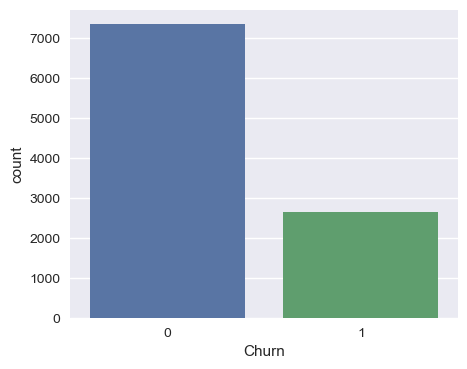

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['Churn']);

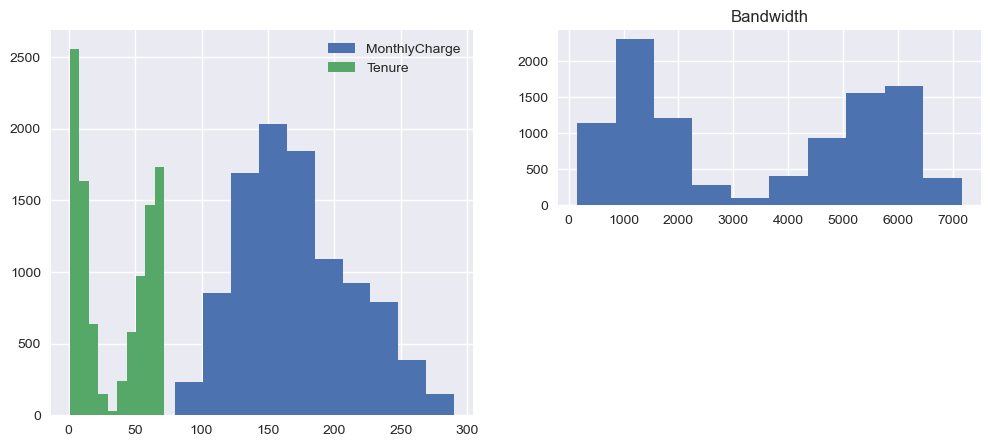

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['MonthlyCharge'], label='MonthlyCharge')
plt.hist(df['Tenure'],label='Tenure')
plt.legend(loc='upper right');
plt.subplot(2,2,2)
plt.hist(df['Bandwidth_GB_Year'])
plt.title('Bandwidth');

**C.3.6** Evaluate summary statistics

In [12]:
df.describe()

,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000000,9.349100,318.854700,2.0877,53.078400,39806.926771,1.99730,0.52060,0.265000,10.001848,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,0.815761,6.843954,184.138499,2.1472,20.698882,28199.916702,1.42839,0.54388,0.441355,2.976019,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,0.000000,0.0000,18.000000,348.670000,0.00000,0.00000,0.000000,0.099747,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,159.000000,0.0000,35.000000,19224.717500,1.00000,0.00000,0.000000,8.018214,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,14.000000,317.000000,1.0000,53.000000,33170.605000,2.00000,0.00000,0.000000,10.018560,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,2.000000,16.000000,480.000000,3.0000,71.000000,53246.170000,3.00000,1.00000,1.000000,11.969485,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,24.000000,638.000000,10.0000,89.000000,258900.700000,4.00000,2.00000,1.000000,21.207230,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


**C.3.7** Create a heat map to see feature correlations

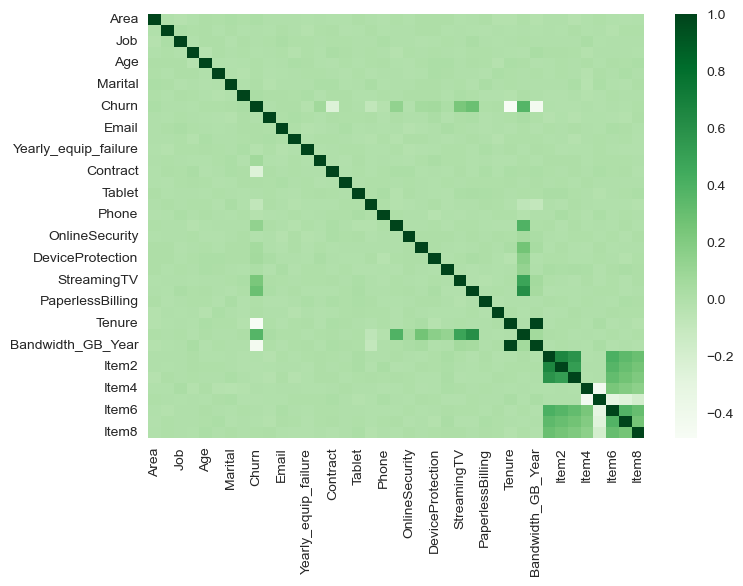

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens');

**C.3.8** Separate data into target and predictors

In [14]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [15]:
# Split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [16]:
print(y_train.value_counts()) 
print(y_test.value_counts())

0    5908
1    2092
Name: Churn, dtype: int64
0    1442
1     558
Name: Churn, dtype: int64


**C.3.9** Create synthetic data

In [17]:
# *1 This code was taken from Goswani(2021)
sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X, y)

In [18]:
y_bal.value_counts()

0    7350
1    7350
Name: Churn, dtype: int64

In [19]:
y.value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

**C.4** Save cleaned data to excel(balanced data is not in this)

In [20]:
X_train.to_excel('Task2_X_train.xlsx')
X_test.to_excel('Task2_X_test.xlsx')
y_train.to_excel('Task2_y_train.xlsx')
y_test.to_excel('Task2_y_test.xlsx')

## PART IV: ANALYSIS

**D.1** Create a balanced train and test set

In [21]:
# Seperate the balanced dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal, test_size = 0.2, random_state=1)

**D.2** 

- Since Random Forests selects the best features automatically, I did not initiate feature selection. <br>
- I did run a loop evaluating different classification algorithms based on Accuracy and AUROC probability score. Among the four classifiers evaluated, Random Forests Classifier presented the highest AUC, and ROC AUC scores.<br>
- After identifying the best classifier for analysis, I proceeded to tune the hyperparameters of the classifier to get better accuracy in predictions. However, my model's default parameters showed the highest accuracy scores.<br>
- I also ran a k-fold cross validation to validate my model's accuracy one last time using cv as 10 meaning. In this cross validation technique the model was trained nine times, then tested for one time, and these steps were repeated ten times, and finally a mean accuracy is calculated. This mean accuracy was consistent with the accuracy I had found earlier.<br>
- To answer my research question of identifying the predictors most valuable to predict customer Churn, I implemented 'feature importance' to understand which features the algorithm favored. Feature importance is a technique that calculates a score for all the features in the analysis "calculated as the decrease in node impurity weighted by the probability of reaching that node, divided by the number of samples"(Ronaghan, 2018)$^3$. A higher score means that the feature will be given more importance in the algorithm (Shin, 2021)$^4$.

LogisticRegression Accuracy Score: 0.828 ROC AUC: 0.909
DecisionTreeClassifier Accuracy Score: 0.88 ROC AUC: 0.88
KNearest Neighbor Accuracy Score: 0.776 ROC AUC: 0.839
RandomForestClassifier Accuracy Score: 0.922 ROC AUC: 0.978


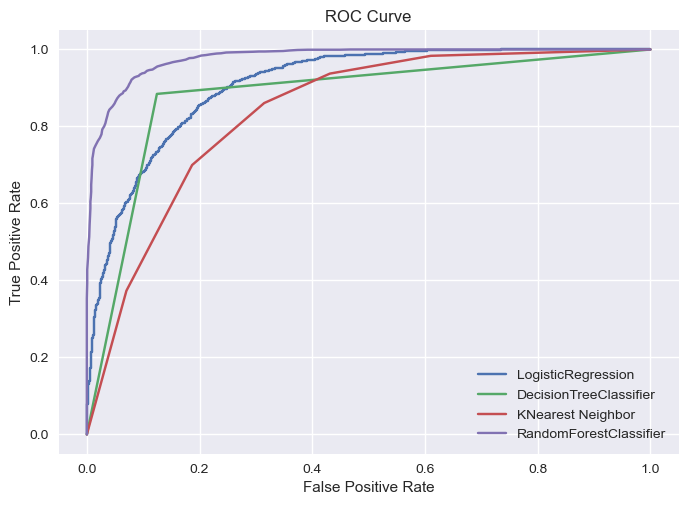

In [22]:
# Choosing the best classifier algorithm

# *2 Some parts of this code was taken from DataCamp

# Define the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNN()
rf = RandomForestClassifier()

classifiers = [('LogisticRegression',lr),
               ('DecisionTreeClassifier', dt),
               ('KNearest Neighbor',knn),
               ('RandomForestClassifier', rf),] 

# Evaluate the models
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predict)
    y_prob = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print(clf_name, 'Accuracy Score:', round(accuracy,3), 'ROC AUC:', round(roc_auc,3))
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob) # from model3.predict(x)

    plt.plot(false_positive_rate, true_positive_rate, label=clf_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend();

In [23]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Random Forests Scores with default parameters 

In [24]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, predict)

y_prob = rf.predict_proba(X_test)[:,1]
rocauc = roc_auc_score(y_test, y_prob)

#Comparing train and test predictions 
train_predict = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_predict)
                           
print('Test Accuracy Score:', round(accuracy,3)) 
print('Train Accuracy Score:', round(train_acc,3))   
print('ROC AUC Score: ', roc_auc)
print('Classification Report:\n', classification_report(y_test, predict))


Test Accuracy Score: 0.919
Train Accuracy Score: 1.0
ROC AUC Score:  0.9779382745100945
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      1424
           1       0.92      0.92      0.92      1516

    accuracy                           0.92      2940
   macro avg       0.92      0.92      0.92      2940
weighted avg       0.92      0.92      0.92      2940



### Hyperparameter Tuning

In [25]:
# *3 Some parts of this code was taken from Koehrsen, W.(2018) 

# try them one at a time(first with max_depth, then max_sample etc.) otherwise it runs for too long
params_rf ={'n_estimators': [10,50,100,300]
            }
# 'max_depth': [10,50,90,100]
# 'max_features': [2,3,5,10],
# 'min_samples_leaf': [2,5,7,10], 
# 'min_samples_split': [2,4,8,10], 
# 'n_estimators': [10,50,100,300]

# It takes lesss time to try these parameters one at a time

grid_rf = GridSearchCV(estimator=rf, param_grid= params_rf,
                      scoring='roc_auc', cv=10, n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 300]},
             scoring='roc_auc')

In [26]:
# Extracting the best parameters
best_hyparams = grid_rf.best_params_
print('Best hyperparameters: ', best_hyparams)

best_CV_score = grid_rf.best_score_
print('Best CV Score: ', best_CV_score)

best_model = grid_rf.best_estimator_
test_acc = best_model.score(X_test, y_test)
print('Accuracy of best model: ', test_acc)

Best hyperparameters:  {'n_estimators': 300}
Best CV Score:  0.9775815770471278
Accuracy of best model:  0.9183673469387755


In [27]:
# Tuning hyperparameters for Random Forests Classifier
rf = RandomForestClassifier(max_depth=90, max_features=5, min_samples_leaf=2, 
                            min_samples_split=2, n_estimators=300)

rf.fit(X_train, y_train)
predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, predict)

y_prob = rf.predict_proba(X_test)[:,1]
rocauc = roc_auc_score(y_test, y_prob)

#Comparing train and test predictions 
train_predict = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_predict)
                           
print('Test Accuracy Score:', round(accuracy,3)) 
print('Train Accuracy Score:', round(train_acc,3))   
print('ROC AUC Score: ', roc_auc)
print('Classification Report:\n', classification_report(y_test, predict))


Test Accuracy Score: 0.918
Train Accuracy Score: 0.997
ROC AUC Score:  0.9779382745100945
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1424
           1       0.92      0.92      0.92      1516

    accuracy                           0.92      2940
   macro avg       0.92      0.92      0.92      2940
weighted avg       0.92      0.92      0.92      2940



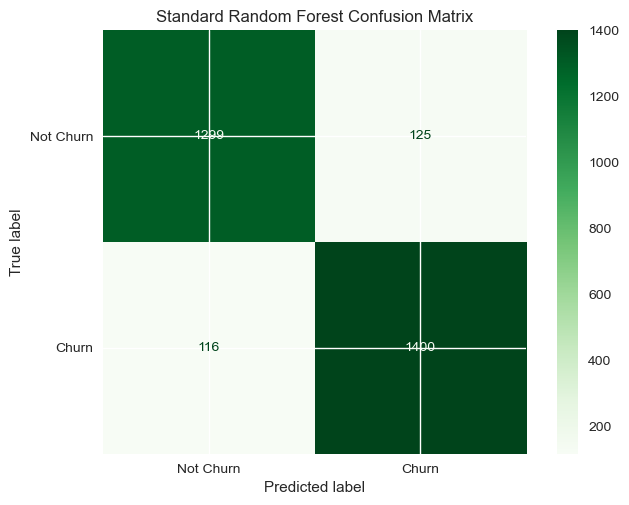

In [28]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(rf, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

### K-Fold Cross Validation

In [30]:
cross_val = cross_val_score(rf, X_train, y_train, cv=10, 
                            scoring='accuracy', n_jobs=-1)
predict_train = rf.predict(X_train)
predict_test = rf.predict(X_test)

train_acc = accuracy_score(y_train, predict_train)
test_acc = accuracy_score(y_test, predict_test)


print('Training Accuracy: ', train_acc)
print('Test Accuracy: ', test_acc)
print('Cross Validation Accuracy: ', cross_val.mean())

Training Accuracy:  0.9967687074829932
Test Accuracy:  0.9180272108843538
Cross Validation Accuracy:  0.9143707482993199


### Feature Importance

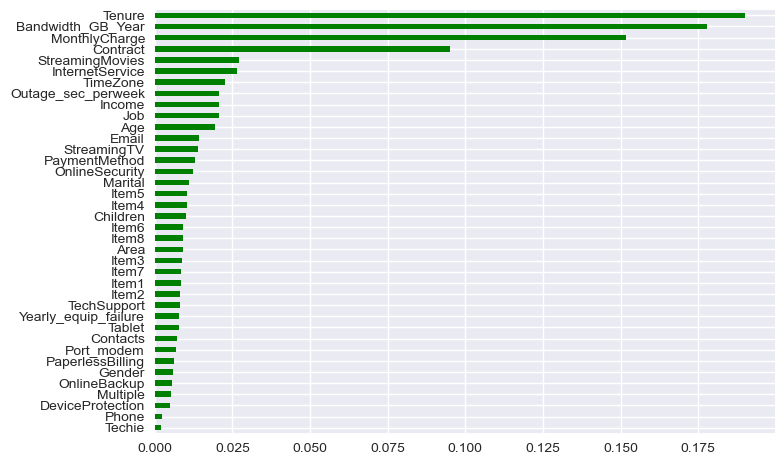

In [31]:
# Feature importance
featureimp = pd.Series(rf.feature_importances_, index = X.columns)
sorted_featureimp = featureimp.sort_values()

# Plot a graph of feature importance 
sorted_featureimp.plot(kind='barh', color='green');

## PART V: DATA SUMMARY AND IMPLICATIONS

**E.1** The Accuracy and ROC AUC of my model with defined parameters I found with Grid Search was the same as with default parameters, indicating the default parameters did not need any improvement. 
The Accuracy was 0.92, ROC AUC was 0.98.

**E.2** My Random Forests Classification model has a high Roc Auc score indicating high accuracy in identifying positive classes. The model was using mostly the five features it calculated as best. These features were Contract, StreamingMovies, Tenure, MonthlyCharge, and Bandwidth_GB_Year.

**E.3** One limitation of my data analysis was that the target class data was imbalanced. I was able to mediate that with an imported library imbalance which added several thousand synthetic data points to my dataset of positive cases extrapolated from the data itself. The only issue this creates is more noise in the feature space. However, without implementing this library, the f-1, recall, and precision for the positive class of Churn was much lower than the negative class, because the training set favored the high count of the negative class, creating bias. 

**E.4** Since my Random Forests Classifier model has high ROC AUC and Accuracy scores, I can trust it to pick out the features it did and make a future prediction with them with 98% accuracy. We should be able to use this model to make future predictions of customer churn with new data. And we can realize that customers' contracts, tenure, monthly charges, bandwidth usage, and whether they stream movies or not have the predicting capabilities for future churn.

## PART VI: DEMONSTRATION

**F. PANOPTO LINK:** 

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3cc73ec5-093d-4fd8-bb29-af6f01736276

**G. THIRD PARTY CODE SOURCES**

$^1$ Goswani,S.(2021). SMOTE using Python. Retrieved December 16, 2022 from https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52e

$^2$ Datacamp.Tree Based Models.

$^3$ Koehrsen, W.(2018) retrieved December 13, 2022 from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


**H. REFERENCES**

$^1$ Cutler, A.(2010). Random Forests for Regression and Classification. Utah State University.

$^2$ Sathpathy, S. (October 6, 2020). Overcoming Class Imbalance using SMOTE Techniques. Retrieved December 16, 2022 from 
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

$^3$ Ronaghan, S., (May 11,2018)
The Mathematics of Decision Trees, Random Forest and Feature Importance in Scikit-learn and Spark
Retrieved December 17, 2022 from 
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20importance%20is%20calculated%20as,the%20more%20important%20the%20feature.

$^4$ Shin, T.(February 26, 2021). Understanding Feature Importance and How to Implement it in Python. Retrieved December 17, 2022 from 
https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
